In [4]:
from requests import get
from bs4 import BeautifulSoup
import os
import re
import unicodedata
import pandas as pd
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from speeches import acquire_speech, clean_speech, all_presidents, president_links, acquire_speech_avalon
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2021/01/20/inaugural-address-by-president-joseph-r-biden-jr/'

In [6]:
words = acquire_speech(url)

In [7]:
speech = clean_speech(words)

(-0.5, 399.5, 199.5, -0.5)

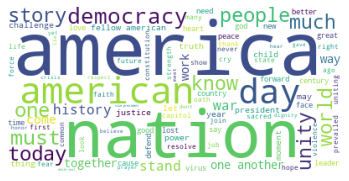

In [8]:
img = WordCloud(background_color='white').generate(speech)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

In [ ]:
print(response.text)

In [ ]:
soup = BeautifulSoup(response.text)
soup

In [ ]:
speech = soup.select('.body-content')

In [ ]:
speech = speech[0].select('p')

In [ ]:
speech[3].text

In [ ]:
words = [words.text for words in speech]
words

In [ ]:
def acquire_speech():
    url = 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2021/01/20/inaugural-address-by-president-joseph-r-biden-jr/'
    headers = {'User-Agent': 'Codeup Data Science'}
    response = get(url, headers= headers)
    soup = BeautifulSoup(response.text)
    speech = soup.select('.body-content')
    speech = speech[0].select('p')
    words = [words.text for words in speech]
    
    return words

In [ ]:
words

In [ ]:
original = ' '.join(words)

In [ ]:
text = original.lower()

In [ ]:
text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [ ]:
text = re.sub(r"[^a-z0-9'\s]", '', text)

In [ ]:
def clean():
    original = ' '.join(words)
    text = original.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = re.sub(r"[^a-z0-9'\s]", '', text)
    
    return text

In [ ]:
text

In [ ]:
wnl = nltk.stem.WordNetLemmatizer()
lemmas = [wnl.lemmatize(word) for word in text.split()]
text_lemma = ' '.join(lemmas)

print(text_lemma)

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['u','ha']
stopwords.extend(newStopWords)

In [ ]:
stopwords

In [ ]:
words = text_lemma.split()

In [ ]:
words

In [ ]:
filtered_words = [w for w in words if w not in stopwords]

In [ ]:
filtered_words

In [ ]:
speech_wo_stopwords = ' '.join(filtered_words)

In [ ]:
speech_wo_stopwords

In [ ]:
split = speech_wo_stopwords.split()

In [ ]:
speech = pd.Series(split).value_counts()

In [ ]:
speech.head(10)

In [ ]:
#convert to dataframe
df = pd.DataFrame(speech)
df.head()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head(10).plot.barh()

In [ ]:
from wordcloud import WordCloud

In [ ]:
img = WordCloud(background_color='white').generate(speech_wo_stopwords)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')